In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [25]:
 data=pd.read_csv('kc_house_data.csv')
 data.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


If the yr_built is less than 1989 and the yr_renovated is 0, we delete them

In [26]:
  d1 = data[data["yr_built"]<1989]
  d2 = data[data["yr_renovated"]==0]

  data[ (data["yr_renovated"] ==0) & (data["yr_built"]<1989) ] = 0

  len (pd.merge(d1, d2, on = "yr_built", how = "inner"))

2962727

In [27]:
data['yr_built'].describe()

count    21613.000000
mean       756.374636
std        968.156030
min          0.000000
25%          0.000000
50%          0.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

histogram of yr_built:

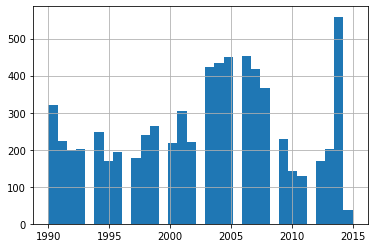

In [28]:
s = data[data["yr_built"]>1989]
s["yr_built"].hist(bins = 33)

barplot of grade::

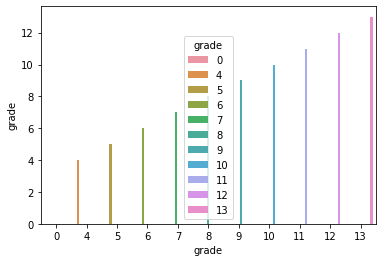

In [29]:
sns.barplot(y='grade',x='grade',hue='grade',data=data);

In [30]:
data['bedrooms'].describe()

count    21613.000000
mean         1.325221
std          1.775830
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         11.000000
Name: bedrooms, dtype: float64

In [31]:
data["bathrooms"].describe()

count    21613.000000
mean         0.986316
std          1.325625
min          0.000000
25%          0.000000
50%          0.000000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

If the number of bedrooms is less than 2 and the number of bathrooms is less than 3, we delete them

In [36]:

d5 = data[data["bathrooms"]<3]
d6 = data[data["bedrooms"]<2]

data[ (data["bedrooms"] <2) & (data["bathrooms"]<3) ] = 0
len (pd.merge(d5, d6, on = "bedrooms", how = "inner"))

39770

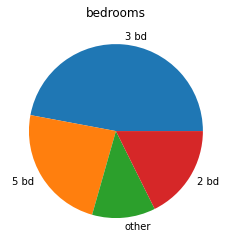

In [37]:

y = np.array([40,20,10, 15])
mylabels = ["3 bd","5 bd", "other","2 bd"]
plt.title("bedrooms")
plt.pie(y, labels = mylabels)
plt.show()

spilt our dataset to trainset & testset

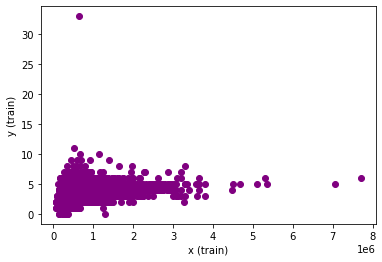

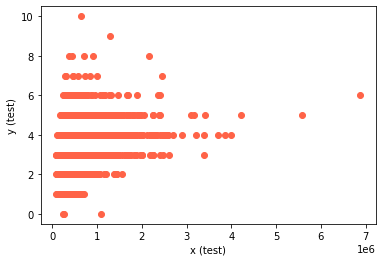

In [35]:

x=data.iloc[:,2:3].values 

y=data.iloc[:,3:4].values 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)
#x & y train
plt.scatter(x_train,y_train,c='purple') 
plt.xlabel('x (train)')
plt.ylabel('y (train)')
plt.show()
#x & y test
plt.scatter(x_test,y_test,c='tomato')
plt.xlabel('x (test)')
plt.ylabel('y (test)')
plt.show()

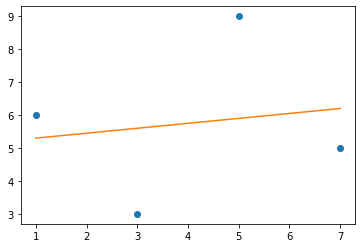

In [39]:
x = np.array([1, 3, 5, 7])

y = np.array([ 6, 3, 9, 5 ])
plt.plot(x, y, 'o')


m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

5. Measure the performance of linear regression using the testing set. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


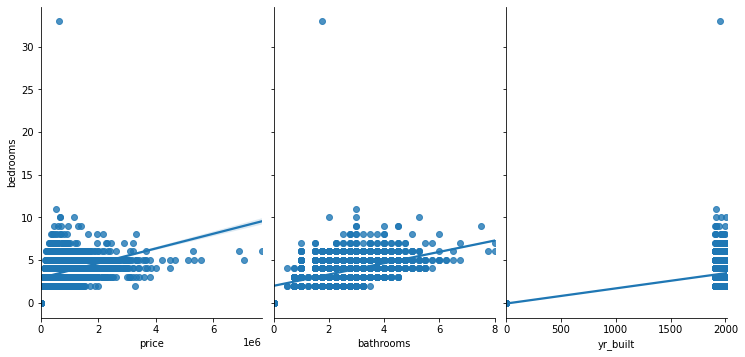

In [44]:
sns.pairplot(data, x_vars=['price','bathrooms','yr_built'], y_vars='bedrooms', size=5, aspect=0.7, kind='reg')

In [46]:

x=data[["bedrooms","bathrooms"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 89030759012.50516
R squared 0.3045458246724614
